## 1. 일반 예측 모델 (2)

### 22. 벡터 자기 회귀 모델

- 벡터 자기 회귀(VAR 모델)
- SARIMAX 예시에서 예상 변수 y_t가 외생 예측 변수의 영향을 받았으나, 반대의 경우는 적용되지 않았음
- 휴일 발생이 레스토랑의 단골 거래에 영향을 주지만, 레스토랑의 단골 손님은 휴일 여부에 관계없이 영향을 주지 않음(영향력이 한 방향으로만 작용)

**그러나, 변수가 서로 영향을 주는 경우가 있음**
- 외생 변수 또한 다른 변수에 의해 영향을 받음
- 벡터 자기 회귀 모델과 특정 사용 사례를 이용 가능
- VAR 모델 내 모든 변수는 `동일한 방식` 으로 모델 입력
- 각 변수는 자체 지연값, 다른 모델 변수의 지연값, 오차항에 기초하여 진화를 설명하는 방정식을 가지고 있음
- 이는, 벡터 자기 회귀 모델링에는 `변수에 영향을 미치는 힘에 관한 지식이 많이 필요하지 않음`
- 필요한 유일한 사전 지식은 동시간에 서로 영향을 주도록 가정할 수 있는 변수 리스트

- 개인 소비 지출의 변화가 개인 가처분소득의 변화에 기초하여 예측된 경우 : 회귀 모델의 벡터 사용
> 개인 가처분소득이 개인 소비 지출에 영향을 미치고, 개인 소비 지출은 개인 가처분소득에 영향을 미치기 때문
- 두 변수 사이에는 양쪽으로 갈 수 있는 관계나 영향 요인이 있음

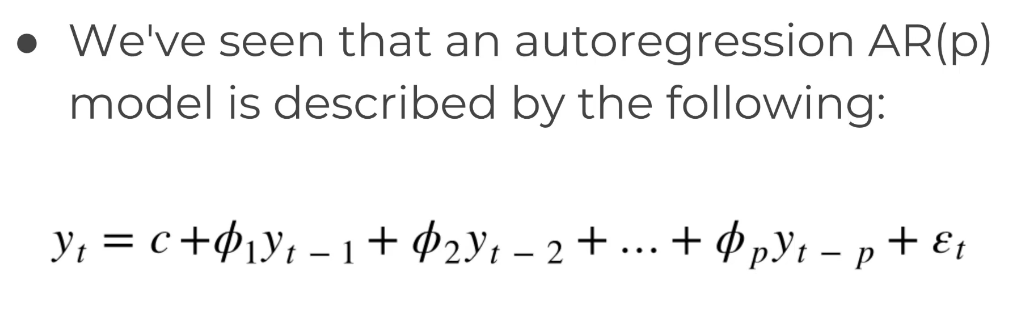

- AR(p) 모델 : 예측하려고 하는 yt항이 있는데 상수 플러스로 정의하고 다수의 파이 값을 지연값으로 곱함
- 차수 p에 관해 yt-1, yt-2 등으로 곱하는 많은 매개변수가 있고, 마지막 오차항이 주어짐
- 자수 p의 벡터 자기 회귀 모델은 k차원으로 정의함
- VAR(p)로 표시되는 차수 p의 k차원 벡터 자기 회귀는 시스템의 y_k 안에서 각 변수를 고려함
- k는 실제 보고 있는 변수의 개수를 말함(2 시리즈, 3 시리즈, 또는 4 시리즈를 보고 있는지)


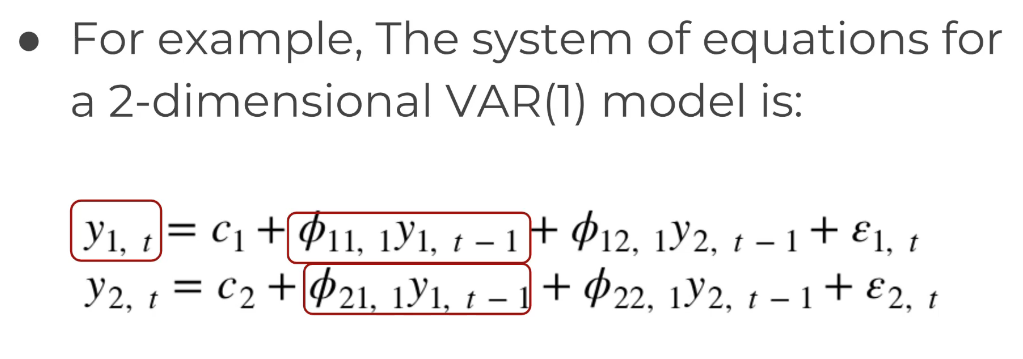

- k=2의 경우 1차수의 2차원 벡터 자기 회귀 모델에 대한 방정식 시스템
- 방정식 2개와 벡터 자기 회귀 p=1 확인
- 방정식 2개로 정의함(모두 y1으로 정의됨) 
- 시간 t의 첫 번째 시리즈 y1, t가 첫 번째 매개변수 -> 자체 5 개매변수를 갖음
- y1이 방정식 2개에 모두 있다는 것을 보여줌으로써, 두 항 사이의 상호 의존성을 보여줌
- 두 번째 시리즈의 y2도 동일
- 기본적으로 2개의 관련 변수가 있음
- 가지고 있는 것이 개인 지출과 개인 가처분소득일 수 도 있음
- 서로 관련 있는 방정식 시스템 설정, 지연 역사적 변수를 기반으로 함
- t-1이 있어 p=1 이라고 말할 수 있고 k=2 라고 말할 수 있음 : y1, y2를 모두 다루고 있으므로

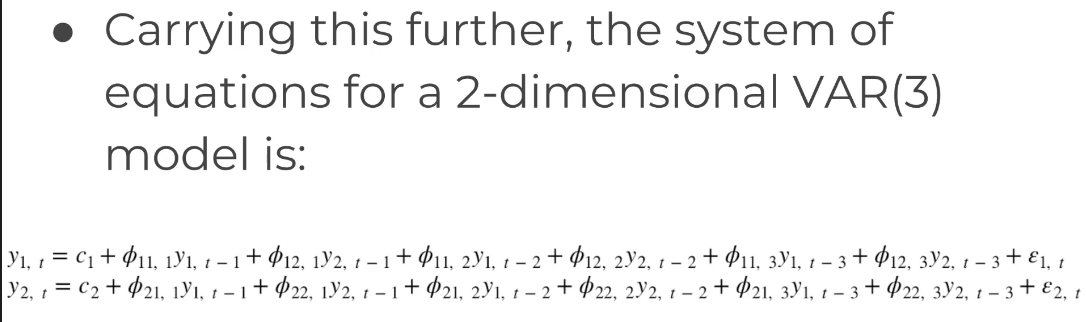

- p=3 라는 2차원 벡터 자기 회귀 모델은 (사례=2 ,y1, y2만 가짐)
- p의 더 큰 차수에 관해 계속 확장한다면 각각에 대한 시차를 취해야 함
- y1, t-1, y2, t-1, t-2, y2 , t-2로 각각을 정의
- 각 시리즈 항에 대한 p 차수를 확인, 시스템 방정식을 설정하여 y1, y2 간 상호 의존성을 분명히 함

#### 벡터 자기 회귀 모델 일반 적인 절차

- 데이터 검사(전문 지식) : 두 시리즈 사이의 상호 의존성에 관한 좋은 아이디어
- 데이터 시각화
-  정상에 관한 데이터 테스트
- 정상 결과에 따라 적절한 차수 p를 선택, 이에 따라 아리마 사용
- 모델의 구체적인 예시를 들어 나타낸 다음, 훈련 데이터셋에 맞춤(어떤 종류의 전환을 적용하여 정상으로 나타내야 하는경우 이전 변화를 뒤집을 수 있음)
- 알려진 테스트 데이터셋에 대한 모델 예측을 평가하고 결과에 만족하면, 전체 모델을 모든 데이터에 대해 다시 훈련시킨 후 미래를 예측 가능

### 23. 벡터 자기 회귀 모델 Code Along - Part 1

- 서로 영향이 있다고 여겨지는 시계열 데이터셋 2개에 대해 `벡터 자기 회귀` 사용 -> `미래 예측`

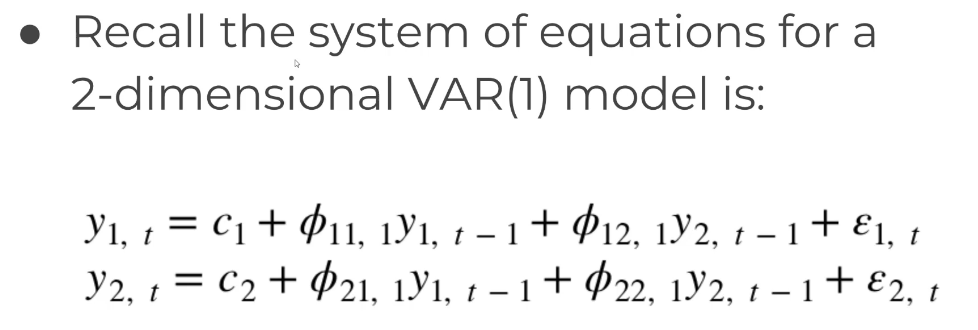

- y1 : 개인 소비 지출
- y2 : M2 Money Stock 

- k=2, 서로 연관성이 있는 두 시계열
- p의 최고값을 구해야 함(p를 더 높은 차수로 확장해야함)
- 벡터 자기 회귀 모델에 대한 최적의 차수 p 파악

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/M2SLMoneyStock.csv', index_col=0, parse_dates=True)
df.index.freq='MS'

sp = pd.read_csv('data/PCEPersonalSpending.csv', index_col=0, parse_dates=True)
sp.index.freq='MS'

In [3]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [4]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [5]:
df = df.join(sp)

In [6]:
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


In [7]:
df = df.dropna()

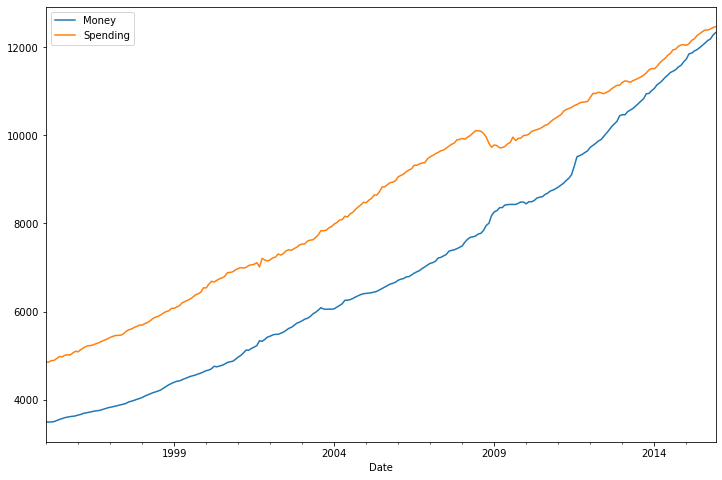

In [8]:
df.plot(figsize=(12,8));

##### `디키 풀러  테스트 함수`

In [9]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


    -> 둘다 비정상 데이터 (non-stationary)

In [12]:
df_transformed = df.diff() # 첫 번째 차분

In [13]:
df_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [14]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [15]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


    - Money는 여전히 비정상, Spending은 정상 데이터

In [16]:
df_transformed

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
...,...,...
2015-08-01,51.5,38.6
2015-09-01,57.0,-1.2
2015-10-01,33.9,23.3


- 차분할 때마다 1행의 데이터를 잃고 있음

In [17]:
df_transformed = df_transformed.diff().dropna()
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [18]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [19]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


    -> 두 번의 차분을 통해 Money, Spending 정상데이터

In [20]:
df_transformed.shape

(250, 2)

#### 1년 뒤의 데이터 예측

In [21]:
# Number of Observations 
nobs = 12 

In [22]:
train = df_transformed[:-nobs] #  start = beginning of DF --> -12 from the end
test = df_transformed[-nobs:] # start -12 from the end of Df --> go to the end df DF

In [23]:
train

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2014-08-01,-31.9,40.3
2014-09-01,5.6,-70.7
2014-10-01,25.5,52.5


In [24]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


## 격자탐색 - Var 모델의  AR(p) 

In [25]:
model = VAR(train)

for p in [1,2,3,4,5,6,7]:
    
    results = model.fit(p) # 벡터 자기 회귀 모델 주요 매개변수
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')
    

ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163703


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458281


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.79763872791397




- 높이 가다보면 AIC가 모델을 처벌하기 시작함(모델이 복잡해지기 때문에)
- 가장 낮은 AIC의 변곡점을 구해야 함
- 차수 5가 가장 낮은 AIC를 가지고 있음

In [26]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Mar, 2022
Time:                     19:41:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

## 25. 벡터 자기 회귀 모델 Code Along - Part 2

In [27]:
# 5개의 지연값을 구하고, Numpy 배열로

train.values.shape

(238, 2)

-> 훈련 데이터셋이 시작하기 직전 마지막 5개의 지연값이 있기 때문에 마지막 5개 지연값 필요

In [28]:
lagged_values = train.values[-5:]
lagged_values

array([[-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [29]:
z = results.forecast(y=lagged_values, steps=12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

-> Money와 Spending에 대한 예측값 리턴 ( `두 번째 차분이라는 조건`에 놓여 있음)

In [30]:
idx = pd.date_range('2015-01-01', periods=12, freq='MS') # 데이터셋이 시작하는 지점
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [31]:
df_forecast = pd.DataFrame(data=z, index=idx, columns=['Money_2d', 'Spending_2d'])
df_forecast

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


#### `차분을 바꾸는 방법`

In [32]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [33]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [34]:
df_forecast.head()

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


-> 2차분, 1차분, True로 나타나는 Money와 Spending

- **두번 째 차분을 원 상태로 되돌리기**
>`전체 데이터 집합의 훈련 사이드에 있는 가장 최신의 첫 번째 차분을 예측된 누적 합에 더함`

- Moeny_2d열에서 누적 합을 가져온 다음, 그렇게 취한 값을 훈련 사이드의 최신 첫 번째 차분에 더함
- 차분은 이동을 취한 다음 이전 이동에서 그것을 빼는 데 이 반대의 작업을 `누적 합인자`라고 부름

In [37]:
test_range = df[-nobs:]
test_range

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


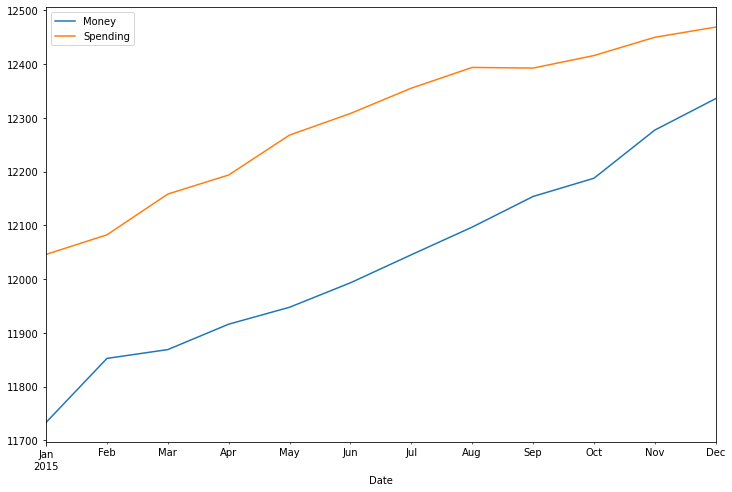

In [39]:
test_range.plot(figsize=(12,8));

In [40]:
df_forecast.columns

Index(['Money_2d', 'Spending_2d', 'Money1d', 'MoneyForecast', 'Spending1d',
       'SpendingForecast'],
      dtype='object')

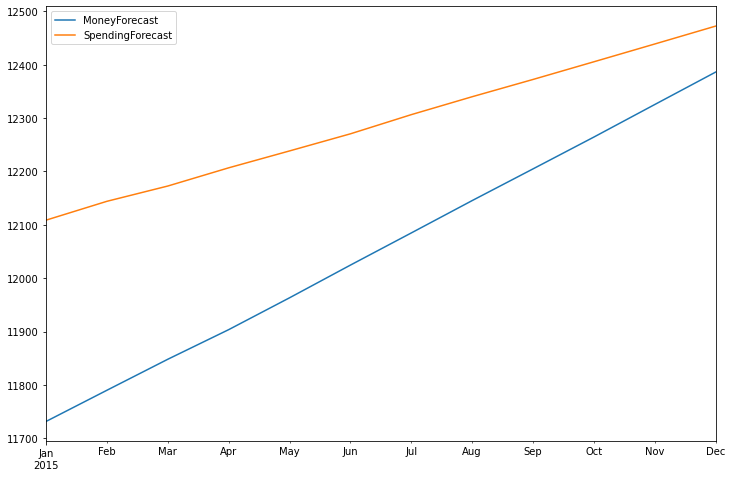

In [43]:
df_forecast[['MoneyForecast', 'SpendingForecast']].plot(figsize=(12,8));

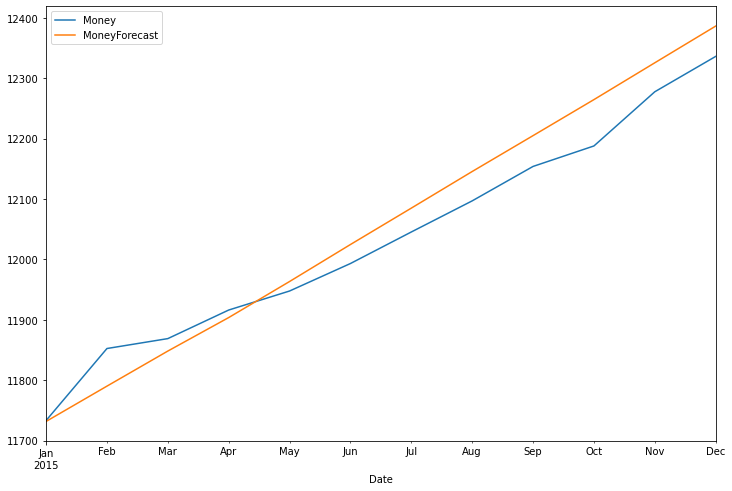

In [44]:
test_range['Money'].plot(legend=True, figsize=(12,8))
df_forecast['MoneyForecast'].plot(legend=True);

-> MoneyForeCast에 대비한 True Money 확인

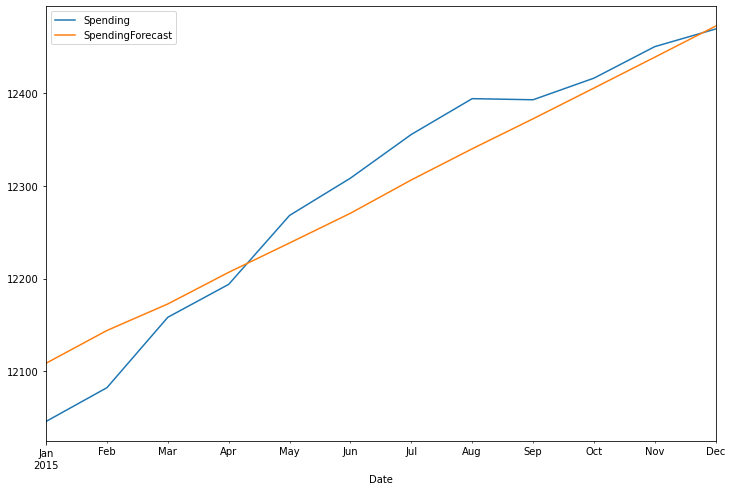

In [45]:
test_range['Spending'].plot(legend=True, figsize=(12,8))
df_forecast['SpendingForecast'].plot(legend=True);

- 실제 Spending이 우리가 고려하지 않은 계절성 구성요소를 가지고 있는 것처럼 보임

In [46]:
rmse(test_range['Money'], df_forecast['MoneyForecast'])

43.71049653558893

In [47]:
test_range['Money'].mean()

12034.008333333333

In [48]:
rmse(test_range['Spending'], df_forecast['SpendingForecast'])

37.00117516940808

In [49]:
test_range['Spending'].mean()

12294.533333333335

###  25. 벡터 자기 회귀 이동 평균

- VARMA 모델(벡터 자기 회귀 모델)
- 벡터 자기 회귀와 시스템 방정식에 대한 주제를 확장하여 이동 평균항을 포함하면 -> `벡터 자기 회귀 이동 평균 모델`

- 2차원ㅇ ㅔ대한 방정식 시스템 (k=2, p=1의 VAR(1) 모델)
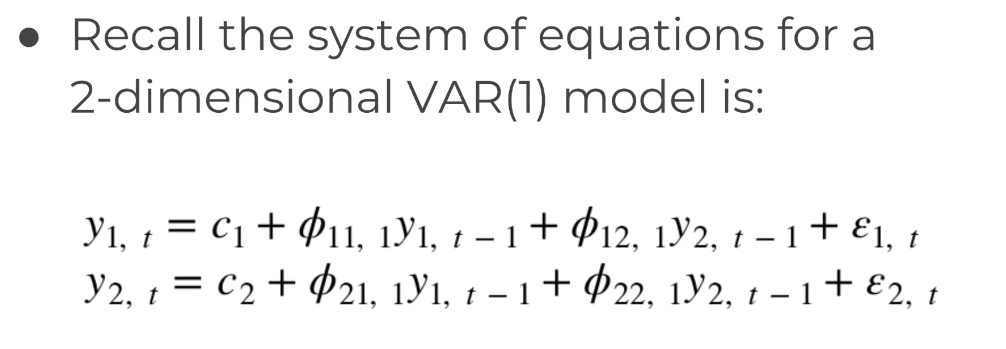
- y1, y2 의 2개의 시리즈가 있으며 차수는 p=1 이라고 결정
- y1, t-1과 y2, t-1 만을 취한다는 의미. 마지막에는 오차항 있음

**ARMA 모델**
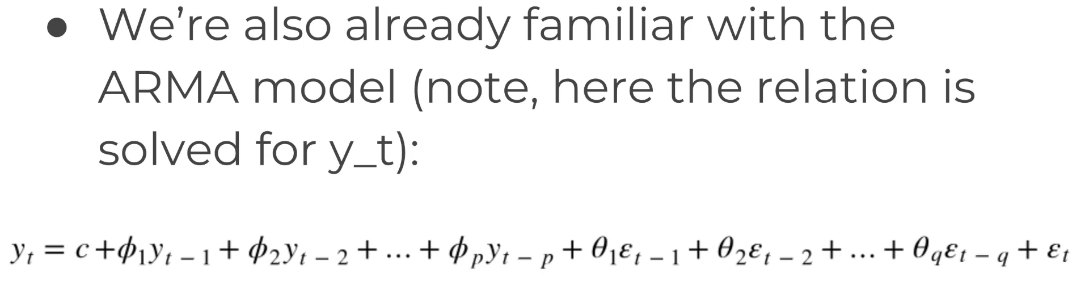
- AR과 MA를 동등하게 하여 균형을 잡음
- 모두 빼서 yt를 풀면 전체 ARMA 모델을 구할 수 있음
- yt= 상수+ 
- AR 항을 차수 P+ 까지 구할 수 있으며 MA 항은 차수 Q까지 가지고 있음
- yt에 대해서 이미 해결됐고 이것이 ARMA 모델이며 이것을 ARIMA로 확장할 수 있음( 데이터를 차분하는 횟수에 대한 i 항)

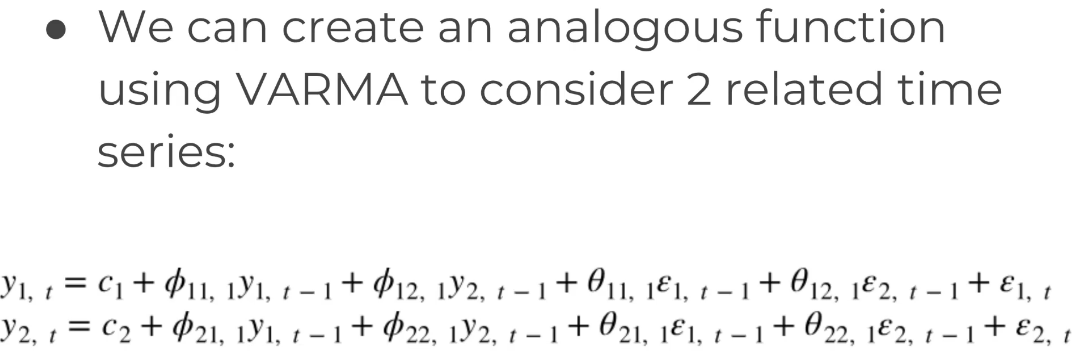

- VARMA를 사용하여 유사한 함수를 만들 수 있는데, 두 개의 관련 시계열을 고려해야 함
- 위는 k=2를 포함한 VARMA 모델임 (y1, y2 두 개의 방정식을 가지고 있음)
- VP1와 Q1 사용 (y1,t-1과 y2, t-2를 말하고 있음 p=1, k=2 의미)
- MA 항도 가지고 있음(Q=1), 오차항을으로 곱한 θ1과 θ2도 있으며, 완전한 오차항 존재

- ARMA에 대해 이미 알고 있는 지식을 벡터 자기 회귀에 적용하면 다수의 시리즈 또는 다수의 K값을 가질 수 있고
- 두 개의 관련 시계열이나 방정식 시스템을 가질 수 있음

### 26. 벡터 자기 회귀 이동 평균 Code Along

- VARMA 모델(벡터 자기 회귀 이동 평균 모델)
- VARMA가 데이터 셋 상에서는 수행 능력이 떨어짐(대체로 전체 벡터 구성요소를 보증하기에 상호작용 항이 충분하지 않음을 나타냄)

In [58]:
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse

In [64]:
# Load datasets
df = pd.read_csv('data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [67]:
df = df.join(sp)
df = df.dropna()
df.shape

(252, 2)

In [68]:
auto_arima(df['Money'], maxiter=1000)

ARIMA(maxiter=1000, order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

 p =1, d=2, q=2

In [69]:
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


In [70]:
auto_arima(df['Spending'], maxiter=1000)

ARIMA(maxiter=1000, order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

p=1, d=1, q=2

In [71]:
df_transformed = df.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


### train/test/split

In [72]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [73]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


### Fit the VARMA(1,2) Model

In [74]:
model = VARMAX(train, order=(1,2), trend='c')
results = model.fit(maxiter=1000, disp=False)
results.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.468
,+ intercept,AIC,4606.936
Date:,"Mon, 07 Mar 2022",BIC,4665.965
Time:,20:06:55,HQIC,4630.726
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.48, 0.00",Jarque-Bera (JB):,"553.27, 126.13"
Prob(Q):,"0.49, 0.99",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.67, 2.87",Skew:,"1.34, -0.35"


### 모델 예측

In [75]:
df_forecast = results.forecast(12)
df_forecast

,Money,Spending
2015-01-01,-12.338751,37.292584
2015-02-01,-11.343347,-4.728096
2015-03-01,1.820773,-0.155889
2015-04-01,-1.822734,-0.224239
2015-05-01,1.309025,0.282843
2015-06-01,-0.587663,0.029804
2015-07-01,0.656923,0.205098
2015-08-01,-0.143349,0.093845
2015-09-01,0.373821,0.165977
2015-10-01,0.040022,0.119459


### 변환 뒤집기

In [76]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

In [77]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

In [78]:
df_forecast

,Money,Spending,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-12.338751,37.292584,66.261249,11657.761249,47.892584,12099.292584
2015-02-01,-11.343347,-4.728096,54.917902,11646.417902,43.164487,12094.564487
2015-03-01,1.820773,-0.155889,56.738675,11648.238675,43.008598,12094.408598
2015-04-01,-1.822734,-0.224239,54.915941,11646.415941,42.784359,12094.184359
2015-05-01,1.309025,0.282843,56.224966,11647.724966,43.067201,12094.467201
2015-06-01,-0.587663,0.029804,55.637302,11647.137302,43.097005,12094.497005
2015-07-01,0.656923,0.205098,56.294226,11647.794226,43.302103,12094.702103
2015-08-01,-0.143349,0.093845,56.150877,11647.650877,43.395949,12094.795949
2015-09-01,0.373821,0.165977,56.524698,11648.024698,43.561926,12094.961926
2015-10-01,0.040022,0.119459,56.564720,11648.064720,43.681385,12095.081385


In [79]:
pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1)

,Money,Spending,MoneyForecast,SpendingForecast
2015-01-01,11733.2,12046.0,11657.761249,12099.292584
2015-02-01,11852.4,12082.4,11646.417902,12094.564487
2015-03-01,11868.8,12158.3,11648.238675,12094.408598
2015-04-01,11916.1,12193.8,11646.415941,12094.184359
2015-05-01,11947.6,12268.1,11647.724966,12094.467201
2015-06-01,11993.1,12308.3,11647.137302,12094.497005
2015-07-01,12045.3,12355.4,11647.794226,12094.702103
2015-08-01,12096.8,12394.0,11647.650877,12094.795949
2015-09-01,12153.8,12392.8,11648.024698,12094.961926
2015-10-01,12187.7,12416.1,11648.064720,12095.081385


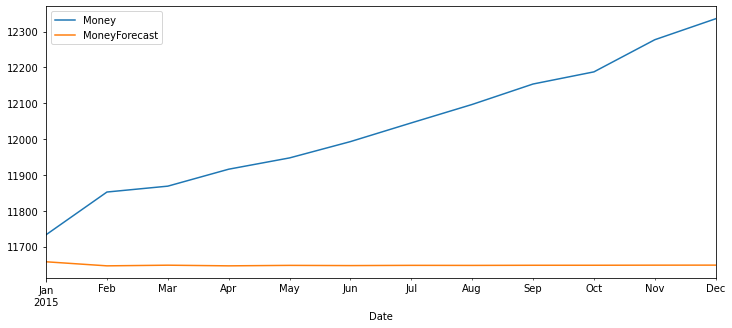

In [80]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

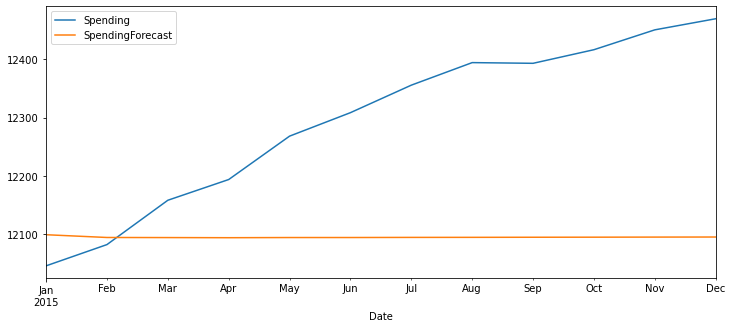

In [81]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

- 간소화된 벡터 자기 회귀 모델보다 잘 수행하지 못하고 있음

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [82]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 423.696


In [83]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 242.850


###  **아리마 모델과 비교 ARMA(1,2) models 시**
- 벡터 자기 회귀 이동 평균 모델이 더 단순한 대안들에 비해 상대적으로 수행 능력이 좋지 못함
- Money Stock과 Personal Consumption Expenditures 사이에 상호의존성이 충분하지 않다는 것을 의미
- 단일 데이터셋에 대해 기본 ARIMA 모델을 실행하는 것이 좋음